In [1]:
import pandas as pd # import pandas library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 29)
pd.set_option('display.width', 1000)

df = pd.read_csv('whamm-vs-wasm_fwks.csv', low_memory=False)
column_dtypes = {
    # "config:run_mode": "string",  
    # "config:monitor": "string",
    # "config:experiment": "string",  
    # "config:special": "string",  
    # "benchmark:suite": "string",  
    # "benchmark:name": "string",  
    # "run_errored": "bool",  
    "run_time:mean": "float64",  
    "run_time:user": "float64",  
    "run_time:system": "float64",  
    # "wiz_metrics_pregen:time_us": "float64",  
    # "wiz_metrics_pregen:bytes": "float64",  
    # "wiz_metrics_load:time_us": "float64",  
    # "wiz_metrics_load:bytes": "float64",  
    # "wiz_metrics_load:time_per_byte": "float64",  
    # "wiz_metrics_validate:time_us": "float64",  
    # "wiz_metrics_validate:bytes": "float64",  
    # "wiz_metrics_validate:time_per_byte": "float64",  
    # "wiz_metrics_spc:in_bytes": "float64",  
    # "wiz_metrics_spc:code_bytes": "float64",  
    # "wiz_metrics_spc:data_bytes": "float64",  
    # "wiz_metrics_spc:time_us": "float64",  
    # "wiz_metrics_spc:functions": "float64",  
    # "wiz_metrics_spc:time_per_byte": "float64",  
    # "wiz_metrics_start:time_us": "float64",  
    # "wiz_metrics_main:time_us": "float64",  
    # "wiz_metrics_main:time_cycles": "float64",  
    # "wiz_metrics_probes:fired": "float64",  
    # "wiz_metrics_whamm:bind_time_us": "float64",  
    # "wiz_metrics_whamm:report_time_us": "float64",  
    # "run_cmd": "string",  
    # "run_timed_out": "bool"
}
polybench = pd.read_csv('RERUN-polybench.csv', low_memory=False, dtype=column_dtypes)
r3 = pd.read_csv('RERUN-r3.csv', low_memory=False, dtype=column_dtypes)

In [2]:
whamm_df = pd.concat([r3, polybench])
whamm_df

,Unnamed: 0,config:run_mode,config:monitor,config:experiment,config:special,benchmark:suite,benchmark:name,run_time:mean,run_cmd,run_timed_out
0,486,int-rt-int,hotness,whamm_engine,NaN,r3,rfxgen.wasm,106.527386,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
1,488,jit-rt-int,hotness,whamm_engine,NaN,r3,rfxgen.wasm,106.907194,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
2,490,int-rt-jit,hotness,whamm_engine,NaN,r3,rfxgen.wasm,73.205664,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
3,492,jit-rt-jit,hotness,whamm_engine,NaN,r3,rfxgen.wasm,73.786414,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
4,494,int-tramp-int,hotness,whamm_engine,NaN,r3,rfxgen.wasm,458.521465,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
...,...,...,...,...,...,...,...,...,...,...
8521,1387,v8-prod,imix,wasabi,NaN,polybench,cholesky.wasm,50.274926,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
8522,1388,v8,imix,wasabi,NaN,polybench,seidel-2d.wasm,23.648174,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
8523,1389,v8-prod,imix,wasabi,NaN,polybench,seidel-2d.wasm,23.530117,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False
8524,1390,v8,imix,wasabi,NaN,polybench,lu.wasm,56.896714,/home/evgilber/git/papers/oopsla2025-whamm/eva...,False


In [3]:
# SUITE = 'r3'
WHAMM_ENGINE = 'whamm_engine'
WHAMM_REWRITE = 'whamm_rewrite'
WHAMM_HW = 'whamm_hw'
ENGINE_NATIVE = 'wizard_native'
WASABI = 'wasabi'
ORCA = 'orca_rewrite'

RUNTIME_MEASUREMENT = 'run_time:mean'
# RUNTIME_MEASUREMENT = 'wiz_metrics_main:time_us'
# REPORT_MEASUREMENT = 'wiz_metrics_whamm:report_time_us'

# Baseline jit data
baseline_polybench_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == 'polybench')]
baseline_r3_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == 'r3')]
# baseline_polybench_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)]
# print(whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)])
# print(baseline_polybench_jit_df)
# baseline_polybench_jit_df.head()

def get_monitor_df(mon):
    new_df_rows = []
    for SUITE in ["polybench"]:
        monitor_polybench_df = whamm_df[(whamm_df['config:monitor'] == mon) & (whamm_df['benchmark:suite'] == SUITE) & (whamm_df['config:special'].isna())]
        for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
            if SUITE == 'polybench':
                baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
            else:
                baseline_data = baseline_r3_jit_df[baseline_r3_jit_df['benchmark:name'] == benchmark_name]
            # print(baseline_data)
            # assert len(baseline_data) == 1, "found multiple baselines for JIT!"
            base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]
            
            # whamm-engine
            engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            # assert len(engine_data) == 11, f"found wrong number of results, expected 11: {len(engine_data)}"
            engine_inline = engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]

            # whamm-rewrite
            rewriting_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_REWRITE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            # assert len(rewriting_data) == 2, f"found wrong number of results, expected 2: {len(rewriting_data)}"
            try:
                rewrite_jit = rewriting_data[rewriting_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
            except:
                rewrite_jit = 600
        
            # whamm-hw
            hw_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_HW) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            # print(hw_data)
            # assert len(hw_data) == 11, f"found wrong number of results, expected 11: {len(hw_data)}"
            hw_inline = hw_data[hw_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]
            
            # engine_native
            virgil_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ENGINE_NATIVE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            try:
                virgil_time = virgil_data[virgil_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
            except:
                # baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
        
                assert len(baseline_data) == 1, "found multiple baselines for JIT!"
                base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]

                base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
                
                # virgil
                if mon == 'cache-sim':
                    virgil_time = df[df['benchmark'] == benchmark_name][f'cache-virgil'].values[0]
                else:
                    try:
                        virgil_time = df[df['benchmark'] == benchmark_name][f'{mon}-virgil'].values[0]
                    except:
                        virgil_time = 0
            
            # wasabi
            wasabi_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WASABI) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            try:
                wasabi_time = wasabi_data[wasabi_data['config:run_mode'] == 'v8'][RUNTIME_MEASUREMENT].values[0]

                base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
            except:
                try:
                    if mon == 'cache-sim':
                        wasabi_time = df[df['benchmark'] == benchmark_name][f'cache-wasabi'].values[0]
                    else:
                        wasabi_time = df[df['benchmark'] == benchmark_name][f'{mon}-wasabi'].values[0]
                except:
                    wasabi_time = 0
        
            # orca-rewrite
            orca_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ORCA) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            # assert len(orca_data) == 2, f"found wrong number of results, expected 2: {len(orca_data)}"
            # print(benchmark_name)
            # print(orca_data)
            try:
                orca_jit = orca_data[orca_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
            except:
                orca_jit = 600 # 10 minute timeout

            
            # (Calculate relative overhead here)
            new_df_rows.append({
                'suite': SUITE,
                'benchmark': benchmark_name,
                'time-jit': base_jit,
                '$\\it{wei}$-handwritten, inlined': hw_inline / base_jit,
                '$\\it{wei}$, inlined': engine_inline / base_jit,
                'Whamm rewriting, jit': rewrite_jit / base_jit,
                'engine-native, jit': virgil_time / base_jit,
                'Orca rewriting, jit': orca_jit / base_jit,
                'wasabi, v8': wasabi_time / base_v8,
            })
    
    return pd.DataFrame(new_df_rows)


branches_df = get_monitor_df('branches')
hotness_df = get_monitor_df('hotness')
icount_df = get_monitor_df('icount')
imix_df = get_monitor_df('imix')
cache_df = get_monitor_df('cache-sim')
mem_access_df = get_monitor_df('mem-access')
loop_tracer_df = get_monitor_df('loop-tracer')
basic_blocks_df = get_monitor_df('basic-blocks')
instr_coverage_df = get_monitor_df('instr-coverage')
call_graph_df = get_monitor_df('call-graph')

In [4]:
branches_df[branches_df['suite'] == 'polybench']['time-jit'].sort_values()

11    0.011606
6     0.013123
18    0.014999
24    0.015171
0     0.016068
17    0.016296
10    0.016526
21    0.016652
13    0.023630
7     0.028794
12    0.030215
1     0.033400
14    0.033575
8     0.033893
16    0.034403
19    0.036751
2     0.039974
4     0.045685
5     0.056320
22    0.058729
25    0.068561
15    0.069889
20    0.096903
23    0.099702
26    0.164803
9     0.174535
28    0.175002
27    0.196912
3     0.371283
Name: time-jit, dtype: float64

In [5]:
def group(x):
    if x["suite"] == "r3":
        if x["time-jit"] < 0.30:
            return 4
            time = "short"
        elif x["time-jit"] < 0.79:
            return 5
            time = "medium"
        else:
            time = "long"
            return 6
        return f"r3-{time}"
    else:
        if x["time-jit"] < 0.030:
            return 1
            time = "short"
        elif x["time-jit"] < 0.06:
            return 2
            time = "medium"
        else:
            return 3
            time = "long"
        return f"polybench-{time}"

def make_thirds(all_df):
    all_df['group'] = all_df.apply(group, axis=1)
    # print(all_df.columns)
    # all_df = all_df.dropna()
    # all_df['third'] = all_df['time-jit'].apply(group)
    # mean = pd.DataFrame({
    #     "benchmark": f"{group}",
    #     "time-jit": df['time-jit'].mean(),
    #     "count": len(df),
    #     "$\omega$-handwritten, inlined": df['$\it{whamm}$-handwritten, inlined'].mean(),
    #     "$\omega$, inlined": df['$\it{whamm}$, inlined'].mean(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].mean(),
    #     "seal rewriting, jit": df['Orca rewriting, jit'].mean(),
    #     "engine-native, jit": df['engine-native, jit'].mean(),
    #     "wasabi, v8": df['wasabi, v8'].mean()
    # } for group, df in all_df.groupby("group"))
    # mins = pd.DataFrame({
    #     "benchmark": f"{group}",
    #     "$\omega$-handwritten, inlined": df['$\it{whamm}$-handwritten, inlined'].min(),
    #     "$\omega$, inlined": df['$\it{whamm}$, inlined'].min(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].min(),
    #     "seal rewriting, jit": df['Orca rewriting, jit'].min(),
    #     "engine-native, jit": df['engine-native, jit'].min(),
    #     "wasabi, v8": df['wasabi, v8'].min()
    # } for group, df in all_df.groupby("group"))
    # maxs = pd.DataFrame({
    #     "benchmark": f"{group}",
    #     "$\omega$-handwritten, inlined": df['$\it{whamm}$-handwritten, inlined'].max(),
    #     "$\omega$, inlined": df['$\it{whamm}$, inlined'].max(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].max(),
    #     "seal rewriting, jit": df['Orca rewriting, jit'].max(),
    #     "engine-native, jit": df['engine-native, jit'].max(),
    #     "wasabi, v8": df['wasabi, v8'].max()
    # } for group, df in all_df.groupby("group"))
    # return mean, mins, maxs
    all_df = all_df.rename(columns = {
        '$\\it{wei}$-handwritten, inlined': "$\\it{wei}$-handwritten, inlined",
        '$\\it{wei}$, inlined': "$\\it{wei}$, inlined",
        'Whamm rewriting, jit': "Whamm rewriting, jit",
        'Orca rewriting, jit': "wirm rewriting, jit",
        'engine-native, jit': "engine-native, jit",
        'wasabi, v8': "wasabi, v8"
    })
    # print(all_df.columns)
    return all_df

branches_df_thirds = make_thirds(branches_df)
hotness_df_thirds = make_thirds(hotness_df)
icount_df_thirds = make_thirds(icount_df)
imix_df_thirds = make_thirds(imix_df)
cache_df_thirds = make_thirds(cache_df)
mem_access_df_thirds = make_thirds(mem_access_df)
loop_tracer_df_thirds = make_thirds(loop_tracer_df)
basic_blocks_df_thirds = make_thirds(basic_blocks_df)
instr_coverage_df_thirds = make_thirds(instr_coverage_df)
call_graph_df_thirds = make_thirds(call_graph_df)


In [6]:
imix_df_thirds.groupby("group").count()

,suite,benchmark,time-jit,"$\it{wei}$-handwritten, inlined","$\it{wei}$, inlined","Whamm rewriting, jit","engine-native, jit","wirm rewriting, jit","wasabi, v8"
group,,,,,,,,,
1,10,10,10,10,10,10,10,10,10
2,10,10,10,10,10,10,10,10,10
3,9,9,9,9,9,9,9,9,9


In [82]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_df_grouped(configs):
    num = 5
    fig, axs = plt.subplots(num, 2, figsize=(18, 2.5 * num))
    for i, config in enumerate(configs):
        axs = axs.flatten()
        ax = axs[i]
        # dfs, ylim, mon_name, order, include_benchmarks_label = config
        df, ylim, mon_name, order, include_benchmarks_label = config
        # print(df.columns)
        # df = df[["group"] + order]
    
        # Sort the DataFrame by 'time-jit' in increasing order
        # df_sorted = df.reindex([2, 1, 0, 5, 4, 3])
        # Reset the index to ensure the first entry is properly handled
        # df_sorted.reset_index(drop=True, inplace=True)
        # print(df.columns)
        # benches = ["polybench-short", "polybench-medium", "polybench-long", "r3-short", "r3-medium", "r3-long"]
        # gp = df.groupby(by="group", sort=True)
    
        # Setting y-axis to logarithmic scale (base 10)
        ax.set_yscale('log')
        ax.set_ylim(1, ylim)
    
        color_key = {
            'wirm rewriting, jit': 'sandybrown',
            'engine-native, jit': 'firebrick',
            '$\\it{wei}$-handwritten, inlined': 'lightpink',
            # 'engine-handwritten, jit-rt-jit': ,
            # 'engine-Ω, jit-rt-jit': ,
            '$\\it{wei}$, inlined': 'royalblue',
            'Whamm rewriting, jit': 'indigo',
            'wasabi, v8': 'mediumseagreen'
        }
        colors = [color_key[i] for i in order]
    
        # to_plot = ['engine, jit-rt-int', 'engine, jit-rt-jit', 'engine, jit-wasm-int', 'engine, jit-wasm-jit', 'engine, inlined', 'rewriting, jit']
        # colors = ['sandybrown', 'firebrick', 'lightpink', 'royalblue', 'indigo', 'mediumseagreen']
        # mins = dfs[1][order]
        # mins = mins.reindex([2, 1, 0, 5, 4, 3])
        # maxs = dfs[2][order]
        # maxs = maxs.reindex([2, 1, 0, 5, 4, 3])
        # means = df[order]
        # for c in means.columns:
        #     print(c)
        # means = gp.mean()
        # mins = gp.min()
        # maxs = gp.max()
        # print("----")
        # print("Monitor:", mon_name)
        # print("Mins:")
        # print(mins)
        # print("Maxs:")
        # print(maxs)
        # errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in order]
        # errors = [[means[c] * 0, means[c] * 1.5] for c in means.columns]
        # if mon_name == 'mem-access':
        #     for e in errors:
        #         print("--")
        #         print("min")
        #         print(e[0])
        #         print("max")
        #         print(e[1])

        groups = df["group"].unique()

        width = 0.9  # total width per group
        offsets = np.linspace(-width/3, width/3, len(order))
        # offsets = np.linspace(-0.4, 0.4, len(order))

        for j, group in enumerate(groups):
            for k, item in enumerate(order):
                values = df[df["group"] == group][item]
                pos = j + offsets[k]
                parts = ax.violinplot(values, positions=[pos], widths=0.25, showmeans=True)

                # Color the violin body
                for pc in parts['bodies']:
                    pc.set_facecolor(color_key[item])
                    # pc.set_edgecolor(colors[j])
                    pc.set_alpha(0.7)
                    pc.set_zorder(4)
                for key in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        parts[key].set_color("black")
                
                # Optional: color the mean line too
                # parts['cmeans'].set_color("black")


        
        # means.plot(kind='bar', zorder=3, ax=ax, width=.70, color=colors, yerr=errors, xlabel="")
        # df_sorted[order].plot(kind='bar', zorder=3, ax=ax, width=.70, color=colors)
    
        
        # Set custom x-axis labels
        ax.set_xticks(range(0, len(groups)))
        if include_benchmarks_label:
            ax.set_xticklabels(["polybench-short", "polybench-medium", "polybench-long"], fontsize=12, rotation=0)  # Set the x-tick labels
            # plt.xlabel('Benchmark', fontsize=17, fontweight='bold')
        else:    
            ax.set_xticklabels([]) 
        if i == 1:
            # --- Build legend manually ---
            legend_handles = [Patch(facecolor=c, alpha=0.7, label=lab)
                              # for lab, c in color_key.items()]
                              for c, lab in zip(colors, order)]
                              # color_key]
            ax.legend(handles=legend_handles, loc='upper right', ncol=2)
        # if i == 1:
        #     ax.legend(loc='upper right', fontsize='large', ncol=2)
            
            # legend = ax.get_legend()
            # for artist in ax.get_children():
            #     if artist is not legend:
            #         try:
            #             artist.remove()
            #         except Exception:
            #             pass
            # for spine in ax.spines.values():
            #     spine.set_visible(False)

            # # Remove x and y ticks
            # ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            # ax.grid(False)  # This disables both major and minor gridlines
            # ax.set_ylim(1, 2)
            # ax.set_yticks([])  # Remove y-axis ticks
            # ax.yaxis.set_visible(False)
        # else:
        #     ax.get_legend().remove()
        ax.text(-0.5, ylim * 0.9, mon_name, fontsize=18, fontweight='bold', va='top')
        ax.grid(True, axis='y', zorder=0)

    
        # handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles, col_data, loc='upper left', bbox_to_anchor=(0, 1))
        # plt.tight_layout()        min_vals = df[order].min()
        # min_max_txt = ''
        # for t in order:
        #     print(t)
        #     min_max_txt += f'{t}: {mins[t].min():.1f}-{maxs[t].max():.1f}\n'
        # print(min_max_txt)
        
        # # Add a text box with min/max values to the upper-left corner
        # ax.text(0.03, 0.9, min_max_txt, transform=ax.transAxes, fontsize=12,
        #         verticalalignment='top', horizontalalignment='left', 
        #         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))
        
        # Adding labels and title
        # plt.ylabel('Relative Overhead')
        # Add gridlines
        # create second y axis label
        # ax1 = ax.twinx()
        # ax1.set_yscale('log')
        # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
        # fig.text(0.5, 0.94, f'Ω vs. Wasm-Frameworks ({mon_name})', ha='center', va='top', fontsize=13, fontweight='bold')
        # plt.title(f'Ω vs. Wasm-Frameworks ({mon_name})')
    
    fig.text(0.5, 1.02, f'Whamm vs State-of-the-Art Wasm Instrumentation Frameworks', ha='center', va='top', fontsize=20, fontweight='bold')
    fig.text(-0.01, 0.56, f'Relative Overhead', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    fig.text(0.5, -.01, 'Benchmark Sub-Suite', ha='center', va='bottom', fontsize=17, fontweight='bold')
    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    
    plt.savefig(f"plots/RERUN-whamm-vs-fmk-all-monitors.pdf", bbox_inches='tight')

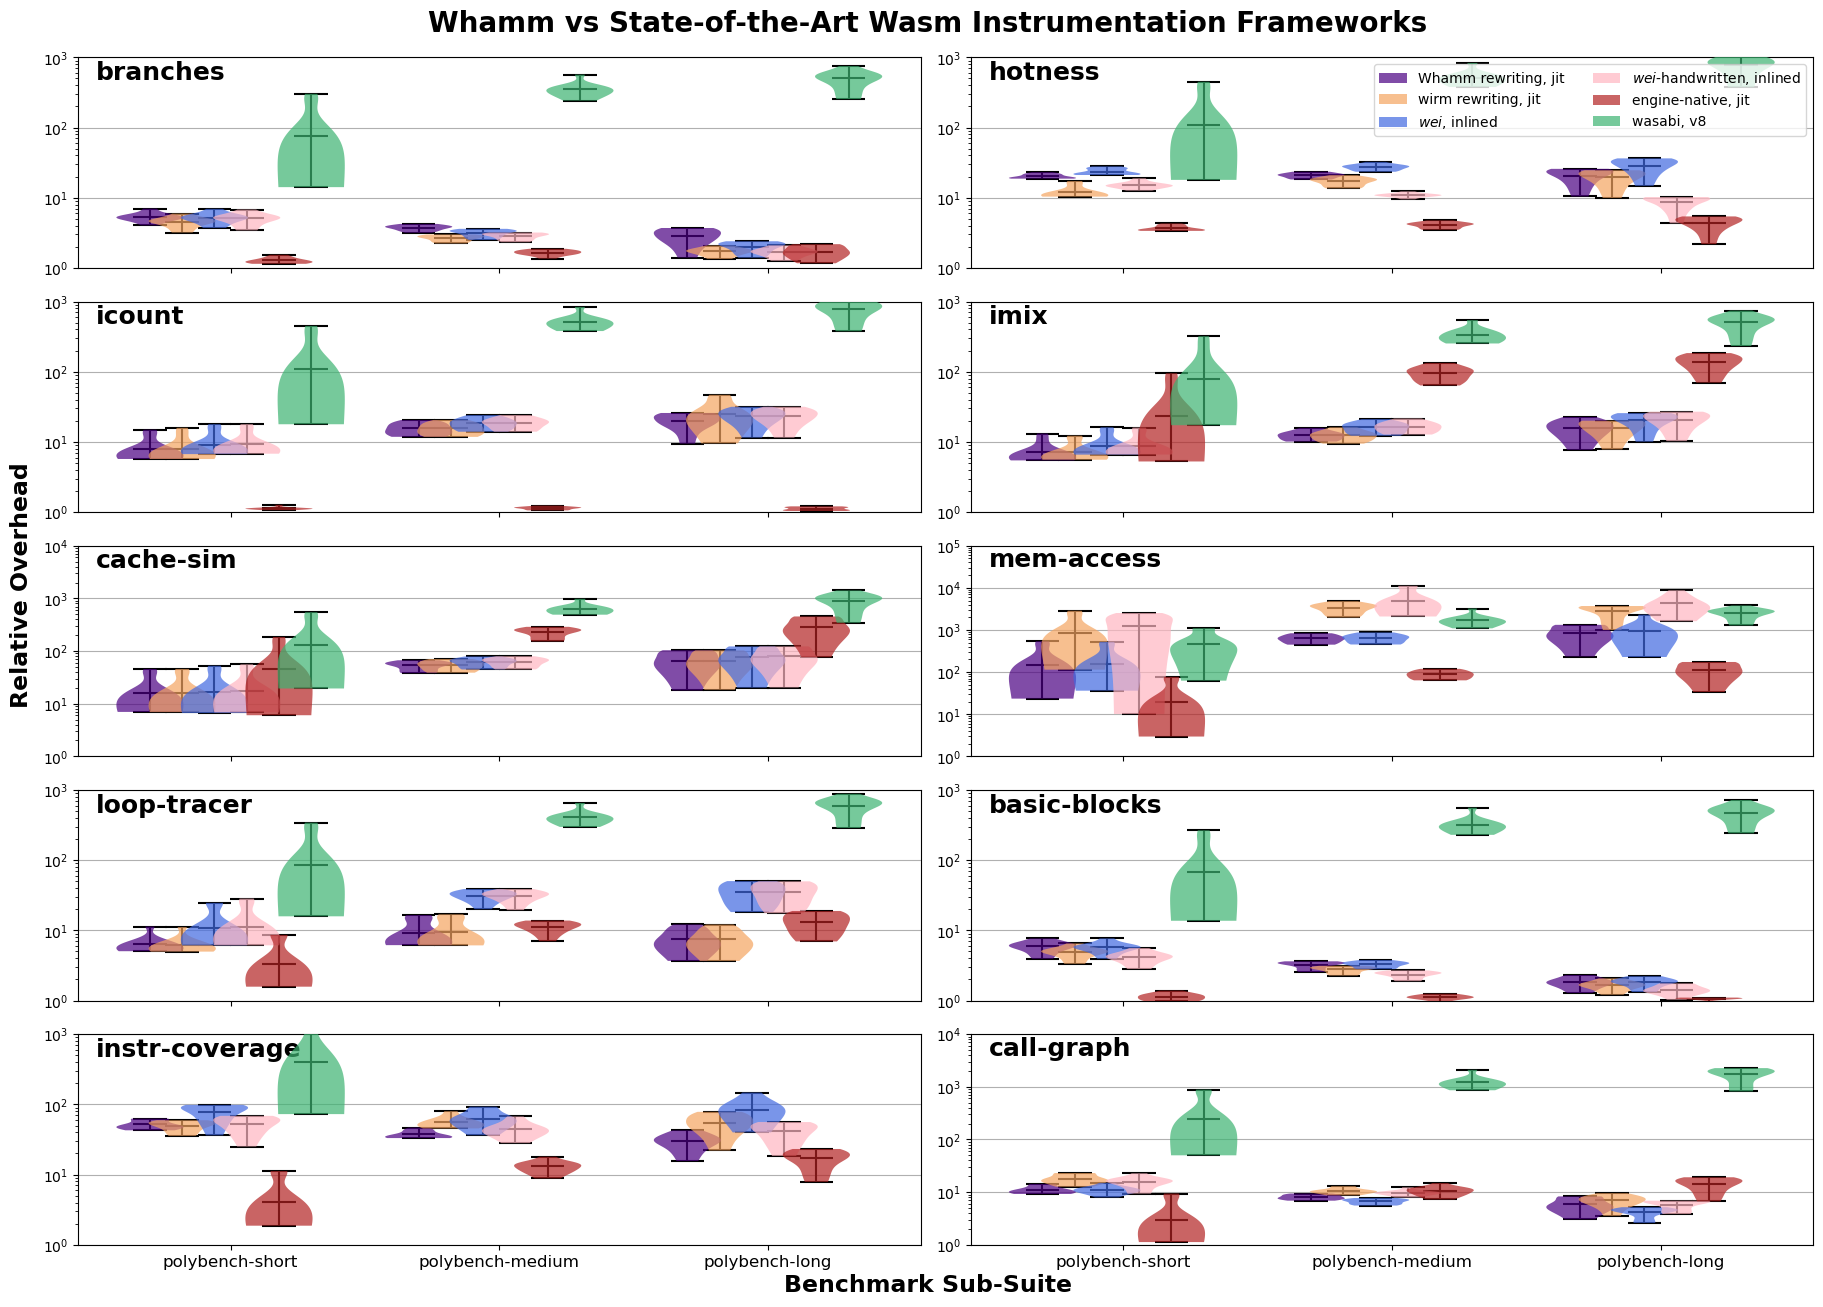

In [83]:
targets = [
        'Whamm rewriting, jit',
        'wirm rewriting, jit',
        '$\\it{wei}$, inlined',
        '$\\it{wei}$-handwritten, inlined',
        # 'engine-handwritten, jit-rt-jit',
        # 'engine-Ω, jit-rt-jit',
        'engine-native, jit',
        'wasabi, v8'
    ]

branches_df_thirds_cfg = (branches_df_thirds, 1e3, 'branches', targets, False)
hotness_df_thirds_cfg = (hotness_df_thirds, 1e3, 'hotness', targets, False)
icount_df_thirds_cfg = (icount_df_thirds, 1e3, 'icount', targets, False)
imix_df_thirds_cfg = (imix_df_thirds, 1e3, 'imix', targets, False)
cache_df_thirds_cfg = (cache_df_thirds, 1e4, 'cache-sim', targets, False)
mem_access_df_thirds_cfg = (mem_access_df_thirds, 1e5, 'mem-access', targets, False)
loop_tracer_df_thirds_cfg = (loop_tracer_df_thirds, 1e3, 'loop-tracer', targets, False)
basic_blocks_df_thirds_cfg = (basic_blocks_df_thirds, 1e3, 'basic-blocks', targets, False)
instr_coverage_df_thirds_cfg = (instr_coverage_df_thirds, 1e3, 'instr-coverage', targets, True)
call_graph_df_thirds_cfg = (call_graph_df_thirds, 1e4, 'call-graph', targets, True)
plot_df_grouped([branches_df_thirds_cfg, hotness_df_thirds_cfg, icount_df_thirds_cfg, imix_df_thirds_cfg, cache_df_thirds_cfg, mem_access_df_thirds_cfg, loop_tracer_df_thirds_cfg, basic_blocks_df_thirds_cfg,
                  instr_coverage_df_thirds_cfg, 
                  call_graph_df_thirds_cfg
                  ])

# polybench

     Unnamed: 0 config:run_mode config:monitor config:experiment  config:special benchmark:suite       benchmark:name  run_time:mean                                            run_cmd run_timed_out
378        7483        base_jit            NaN          base-run             NaN       polybench            bicg.wasm       0.016068  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
380        7485        base_jit            NaN          base-run             NaN       polybench            symm.wasm       0.033400  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
382        7487        base_jit            NaN          base-run             NaN       polybench     gramschmidt.wasm       0.039974  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
384        7489        base_jit            NaN          base-run             NaN       polybench  floyd-warshall.wasm       0.371283  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
386       

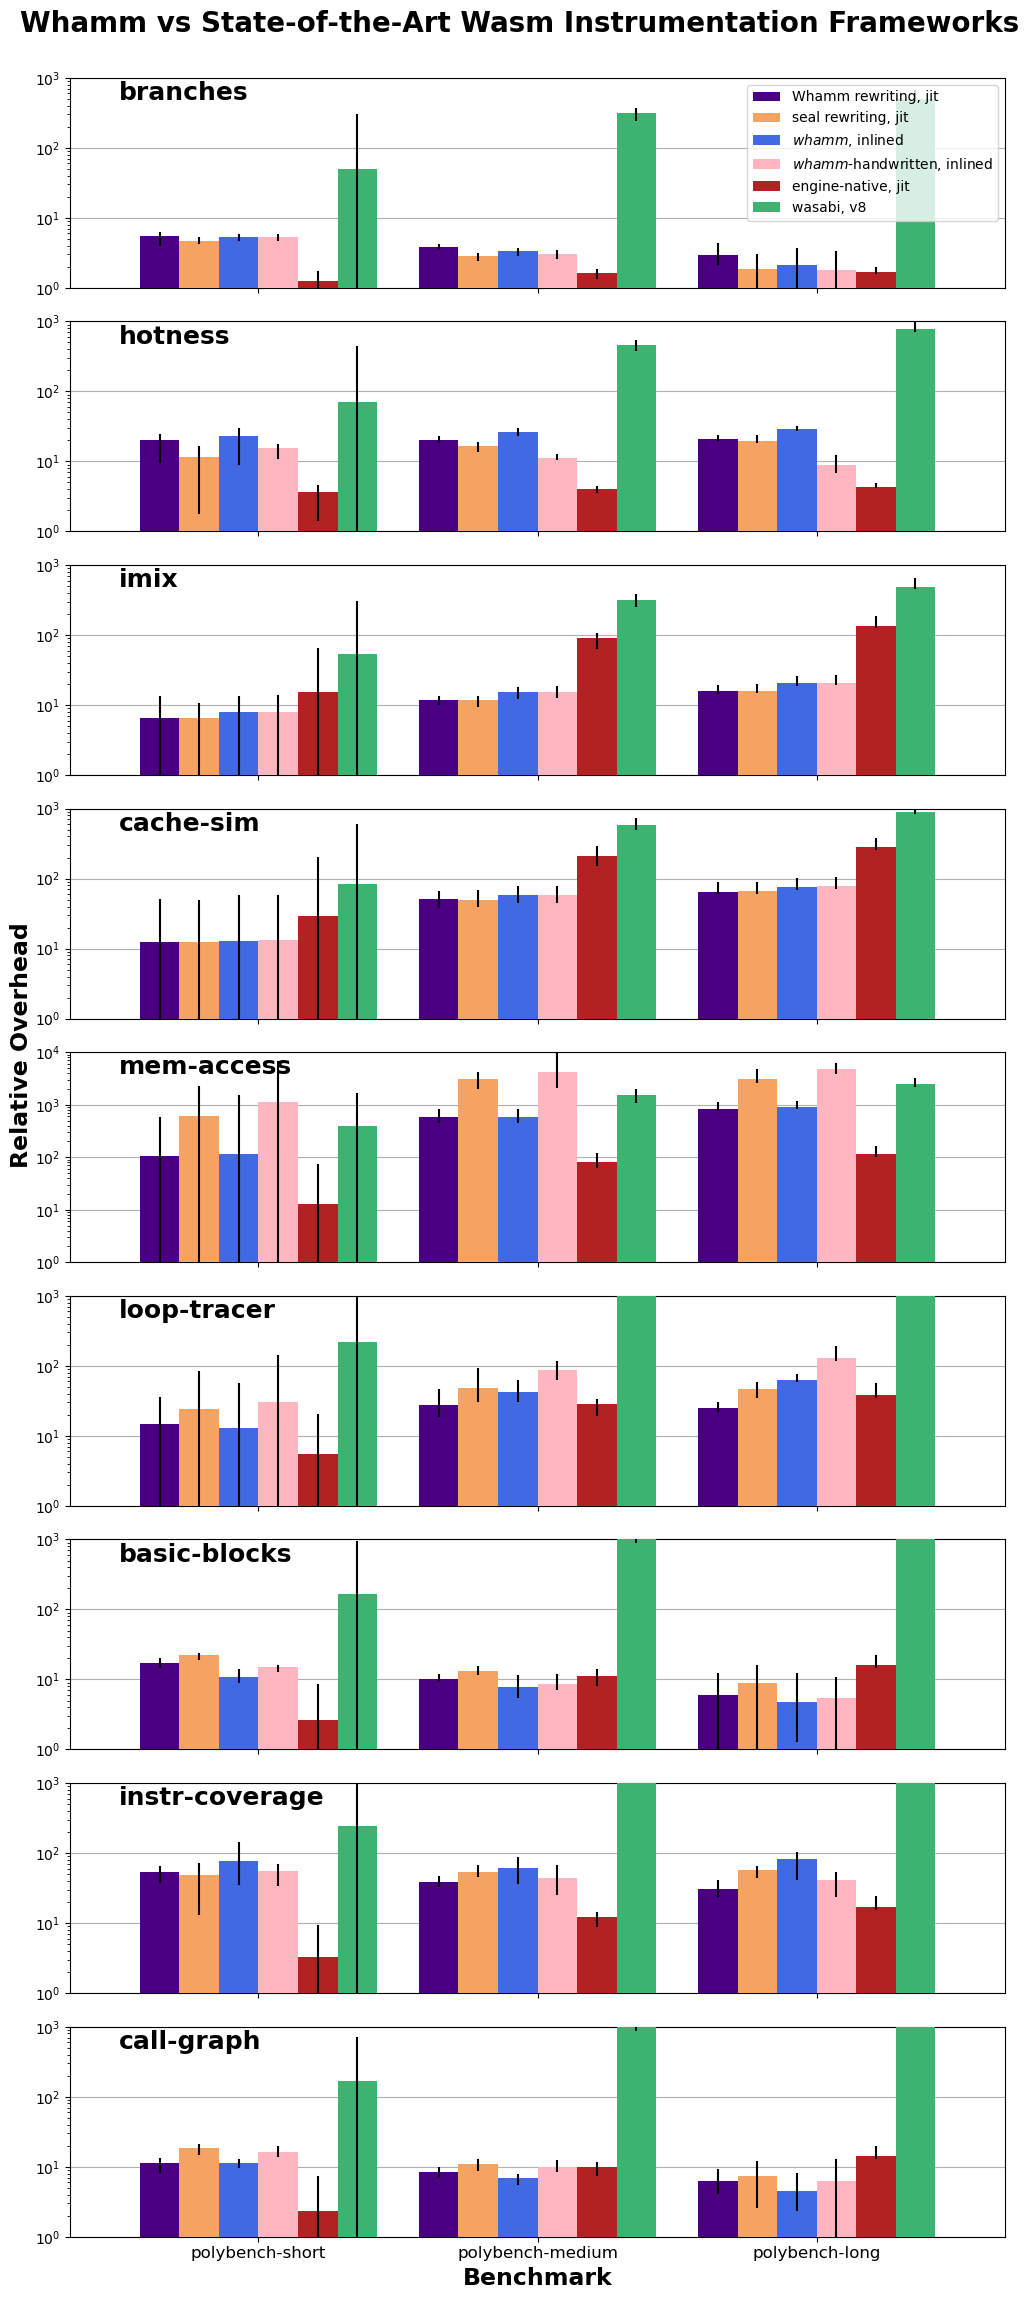

In [9]:
whamm_df = polybench

SUITE = 'polybench'
WHAMM_ENGINE = 'whamm_engine'
WHAMM_REWRITE = 'whamm_rewrite'
WHAMM_HW = 'whamm_hw'
ENGINE_NATIVE = 'wizard_native'
WASABI = 'wasabi'
ORCA = 'orca_rewrite'

RUNTIME_MEASUREMENT = 'run_time:mean'
# RUNTIME_MEASUREMENT = 'wiz_metrics_main:time_us'
# REPORT_MEASUREMENT = 'wiz_metrics_whamm:report_time_us'

# Baseline jit data
baseline_polybench_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)]
# print(whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)])
print(baseline_polybench_jit_df)
# baseline_polybench_jit_df.head()

def get_monitor_df(mon):
    # Monitor data, polybench data!
    monitor_polybench_df = whamm_df[(whamm_df['config:monitor'] == mon) & (whamm_df['benchmark:suite'] == SUITE) & (whamm_df['config:special'].isna())]
    
    new_df_rows = []
    for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
        baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
        assert len(baseline_data) == 1, "found multiple baselines for JIT!"
        base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]
        
        # whamm-engine
        engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # print()
        # print(benchmark_name)
        # print(engine_data)
        # print(engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values)
        # assert len(engine_data) == 11, f"found wrong number of results, expected 11: {len(engine_data)}"
        engine_inline = engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]

        # whamm-rewrite
        rewriting_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_REWRITE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # assert len(rewriting_data) == 2, f"found wrong number of results, expected 2: {len(rewriting_data)}"
        rewrite_jit = rewriting_data[rewriting_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
    
        # whamm-hw
        hw_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_HW) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # print(hw_data)
        # assert len(hw_data) == 11, f"found wrong number of results, expected 11: {len(hw_data)}"
        hw_inline = hw_data[hw_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]
        
        # engine_native
        virgil_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ENGINE_NATIVE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        try:
            virgil_time = virgil_data[virgil_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
        except:
            baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
      
            assert len(baseline_data) == 1, "found multiple baselines for JIT!"
            base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]

            base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
            
            # virgil
            if mon == 'cache-sim':
                virgil_time = df[df['benchmark'] == benchmark_name][f'cache-virgil'].values[0]
            else:
                virgil_time = df[df['benchmark'] == benchmark_name][f'{mon}-virgil'].values[0]
        
        # wasabi
        wasabi_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WASABI) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        try:
            wasabi_time = wasabi_data[wasabi_data['config:run_mode'] == 'v8'][RUNTIME_MEASUREMENT].values[0]

            base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
        except:
            if mon == 'cache-sim':
                wasabi_time = df[df['benchmark'] == benchmark_name][f'cache-wasabi'].values[0]
            else:
                wasabi_time = df[df['benchmark'] == benchmark_name][f'{mon}-wasabi'].values[0]
    
        # orca-rewrite
        orca_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ORCA) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # assert len(orca_data) == 2, f"found wrong number of results, expected 2: {len(orca_data)}"
        print(benchmark_name)
        print(orca_data)
        try:
            orca_jit = orca_data[orca_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
        except:
            orca_jit = 600 # 10 minute timeout

        
        # (Calculate relative overhead here)
        new_df_rows.append({
            'suite': SUITE,
            'benchmark': benchmark_name,
            'time-jit': base_jit,
            '$\\it{whamm}$-handwritten, inlined': hw_inline / base_jit,
            '$\\it{whamm}$, inlined': engine_inline / base_jit,
            'Whamm rewriting, jit': rewrite_jit / base_jit,
            'engine-native, jit': virgil_time / base_jit,
            'Orca rewriting, jit': orca_jit / base_jit,
            'wasabi, v8': wasabi_time / base_v8,
        })
    
    return pd.DataFrame(new_df_rows)


branches_df = get_monitor_df('branches')
hotness_df = get_monitor_df('hotness')
imix_df = get_monitor_df('imix')
cache_df = get_monitor_df('cache-sim')
mem_access_df = get_monitor_df('mem-access')
loop_tracer_df = get_monitor_df('loop-tracer')
basic_blocks_df = get_monitor_df('basic-blocks')
instr_coverage_df = get_monitor_df('instr-coverage')
call_graph_df = get_monitor_df('call-graph')

def group(x):
    # polybench
    if x < 0.025:
        return "short"
    if x < 0.05:
        return "medium"
    return "long"


def make_thirds(all_df):
    # all_df = all_df.dropna()
    all_df['third'] = all_df['time-jit'].apply(group)
    mean = pd.DataFrame({
        "benchmark": f"polybench-{group}",
        "time-jit": df['time-jit'].mean(),
        "count": len(df),
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].mean(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].mean(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].mean(),
        "seal rewriting, jit": df['Orca rewriting, jit'].mean(),
        "engine-native, jit": df['engine-native, jit'].mean(),
        "wasabi, v8": df['wasabi, v8'].mean()
    } for group, df in all_df.groupby("third"))
    mins = pd.DataFrame({
        "benchmark": f"polybench-{group}",
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].min(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].min(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].min(),
        "seal rewriting, jit": df['Orca rewriting, jit'].min(),
        "engine-native, jit": df['engine-native, jit'].min(),
        "wasabi, v8": df['wasabi, v8'].min()
    } for group, df in all_df.groupby("third"))
    maxs = pd.DataFrame({
        "benchmark": f"polybench-{group}",
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].max(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].max(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].max(),
        "seal rewriting, jit": df['Orca rewriting, jit'].max(),
        "engine-native, jit": df['engine-native, jit'].max(),
        "wasabi, v8": df['wasabi, v8'].max()
    } for group, df in all_df.groupby("third"))
    return mean, mins, maxs

branches_df_thirds = make_thirds(branches_df)
hotness_df_thirds = make_thirds(hotness_df)
imix_df_thirds = make_thirds(imix_df)
cache_df_thirds = make_thirds(cache_df)
mem_access_df_thirds = make_thirds(mem_access_df)
loop_tracer_df_thirds = make_thirds(loop_tracer_df)
basic_blocks_df_thirds = make_thirds(basic_blocks_df)
instr_coverage_df_thirds = make_thirds(instr_coverage_df)
call_graph_df_thirds = make_thirds(call_graph_df)

import matplotlib.pyplot as plt

def plot_df_grouped(configs):
    num = len(configs)
    fig, axs = plt.subplots(num, 1, figsize=(10, 2.5 * num))
    for i, config in enumerate(configs):
        ax = axs[i]
        dfs, ylim, mon_name, order, include_benchmarks_label = config
        df = dfs[0]
    
        # Sort the DataFrame by 'time-jit' in increasing order
        df_sorted = df.reindex([2, 1, 0])
        # Reset the index to ensure the first entry is properly handled
        df_sorted.reset_index(drop=True, inplace=True)
    
        # Setting y-axis to logarithmic scale (base 10)
        ax.set_yscale('log')
        ax.set_ylim(1, ylim)
    
        color_key = {
            'seal rewriting, jit': 'sandybrown',
            'engine-native, jit': 'firebrick',
            '$\\it{whamm}$-handwritten, inlined': 'lightpink',
            # 'engine-handwritten, jit-rt-jit': ,
            # 'engine-Ω, jit-rt-jit': ,
            '$\\it{whamm}$, inlined': 'royalblue',
            'Whamm rewriting, jit': 'indigo',
            'wasabi, v8': 'mediumseagreen'
        }
        colors = {i: color_key[i] for i in order}
    
        # to_plot = ['engine, jit-rt-int', 'engine, jit-rt-jit', 'engine, jit-wasm-int', 'engine, jit-wasm-jit', 'engine, inlined', 'rewriting, jit']
        # colors = ['sandybrown', 'firebrick', 'lightpink', 'royalblue', 'indigo', 'mediumseagreen']
        mins = dfs[1]
        maxs = dfs[2]
        means = df[[
            'Whamm rewriting, jit',
            'seal rewriting, jit',
            '$\\it{whamm}$, inlined',
            '$\\it{whamm}$-handwritten, inlined',
            'engine-native, jit',
            'wasabi, v8'
        ]]
        errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in means.columns]
        # errors = [[means[c] * 0, means[c] * 1.5] for c in means.columns]
        # if mon_name == 'mem-access':
        #     for e in errors:
        #         print("--")
        #         print("min")
        #         print(e[0])
        #         print("max")
        #         print(e[1])
        df_sorted[order].plot(kind='bar', zorder=3, ax=ax, width=.85, color=colors, yerr=errors)
    
        
        # Set custom x-axis labels
        if include_benchmarks_label:
            ax.set_xticklabels(df_sorted['benchmark'], fontsize=12, rotation=0)  # Set the x-tick labels
            plt.xlabel('Benchmark', fontsize=17, fontweight='bold')
        else:    
            ax.set_xticklabels([]) 
        if i == 0:
            ax.legend(loc='upper right')
        else:
            ax.get_legend().remove()

        ax.text(-0.5, ylim * 0.9, mon_name, fontsize=18, fontweight='bold', va='top')
    
        # handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles, col_data, loc='upper left', bbox_to_anchor=(0, 1))
        # plt.tight_layout()
        
        # Adding labels and title
        # plt.ylabel('Relative Overhead')
        # Add gridlines
        ax.grid(True, axis='y', zorder=0)
        # create second y axis label
        # ax1 = ax.twinx()
        # ax1.set_yscale('log')
        # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
        # fig.text(0.5, 0.94, f'Ω vs. Wasm-Frameworks ({mon_name})', ha='center', va='top', fontsize=13, fontweight='bold')
        # plt.title(f'Ω vs. Wasm-Frameworks ({mon_name})')
    
    fig.text(0.5, 1.02, f'Whamm vs State-of-the-Art Wasm Instrumentation Frameworks', ha='center', va='top', fontsize=20, fontweight='bold')
    fig.text(-0.01, 0.56, f'Relative Overhead', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    
    plt.savefig(f"plots/RERUN-whamm-vs-fmk-polybench.pdf", bbox_inches='tight')

targets = [
        'Whamm rewriting, jit',
        'seal rewriting, jit',
        '$\\it{whamm}$, inlined',
        '$\\it{whamm}$-handwritten, inlined',
        # 'engine-handwritten, jit-rt-jit',
        # 'engine-Ω, jit-rt-jit',
        'engine-native, jit',
        'wasabi, v8'
    ]


branches_df_thirds_cfg = (branches_df_thirds, 1e3, 'branches', targets, False)
hotness_df_thirds_cfg = (hotness_df_thirds, 1e3, 'hotness', targets, False)
imix_df_thirds_cfg = (imix_df_thirds, 1e3, 'imix', targets, False)
cache_df_thirds_cfg = (cache_df_thirds, 1e3, 'cache-sim', targets, False)
mem_access_df_thirds_cfg = (mem_access_df_thirds, 1e4, 'mem-access', targets, False)
loop_tracer_df_thirds_cfg = (loop_tracer_df_thirds, 1e3, 'loop-tracer', targets, False)
basic_blocks_df_thirds_cfg = (basic_blocks_df_thirds, 1e3, 'basic-blocks', targets, False)
instr_coverage_df_thirds_cfg = (instr_coverage_df_thirds, 1e3, 'instr-coverage', targets, False)
call_graph_df_thirds_cfg = (call_graph_df_thirds, 1e3, 'call-graph', targets, True)
plot_df_grouped([branches_df_thirds_cfg, hotness_df_thirds_cfg, imix_df_thirds_cfg, cache_df_thirds_cfg, mem_access_df_thirds_cfg, loop_tracer_df_thirds_cfg, basic_blocks_df_thirds_cfg,
                  instr_coverage_df_thirds_cfg, call_graph_df_thirds_cfg
                  ])

# r3

      Unnamed: 0 config:run_mode config:monitor config:experiment  config:special benchmark:suite        benchmark:name  run_time:mean                                            run_cmd  run_timed_out
5331           1        base_jit            NaN          base-run             NaN              r3           rfxgen.wasm       0.356485  /home/mschnei2/oopsla2025-whamm/eval/scripts-p...          False
5333           3        base_jit            NaN          base-run             NaN              r3  figma-startpage.wasm       0.399540  /home/mschnei2/oopsla2025-whamm/eval/scripts-p...          False
5335           5        base_jit            NaN          base-run             NaN              r3       rguilayout.wasm       0.382071  /home/mschnei2/oopsla2025-whamm/eval/scripts-p...          False
5337           7        base_jit            NaN          base-run             NaN              r3       mandelbrot.wasm       8.111868  /home/mschnei2/oopsla2025-whamm/eval/scripts-p...          F

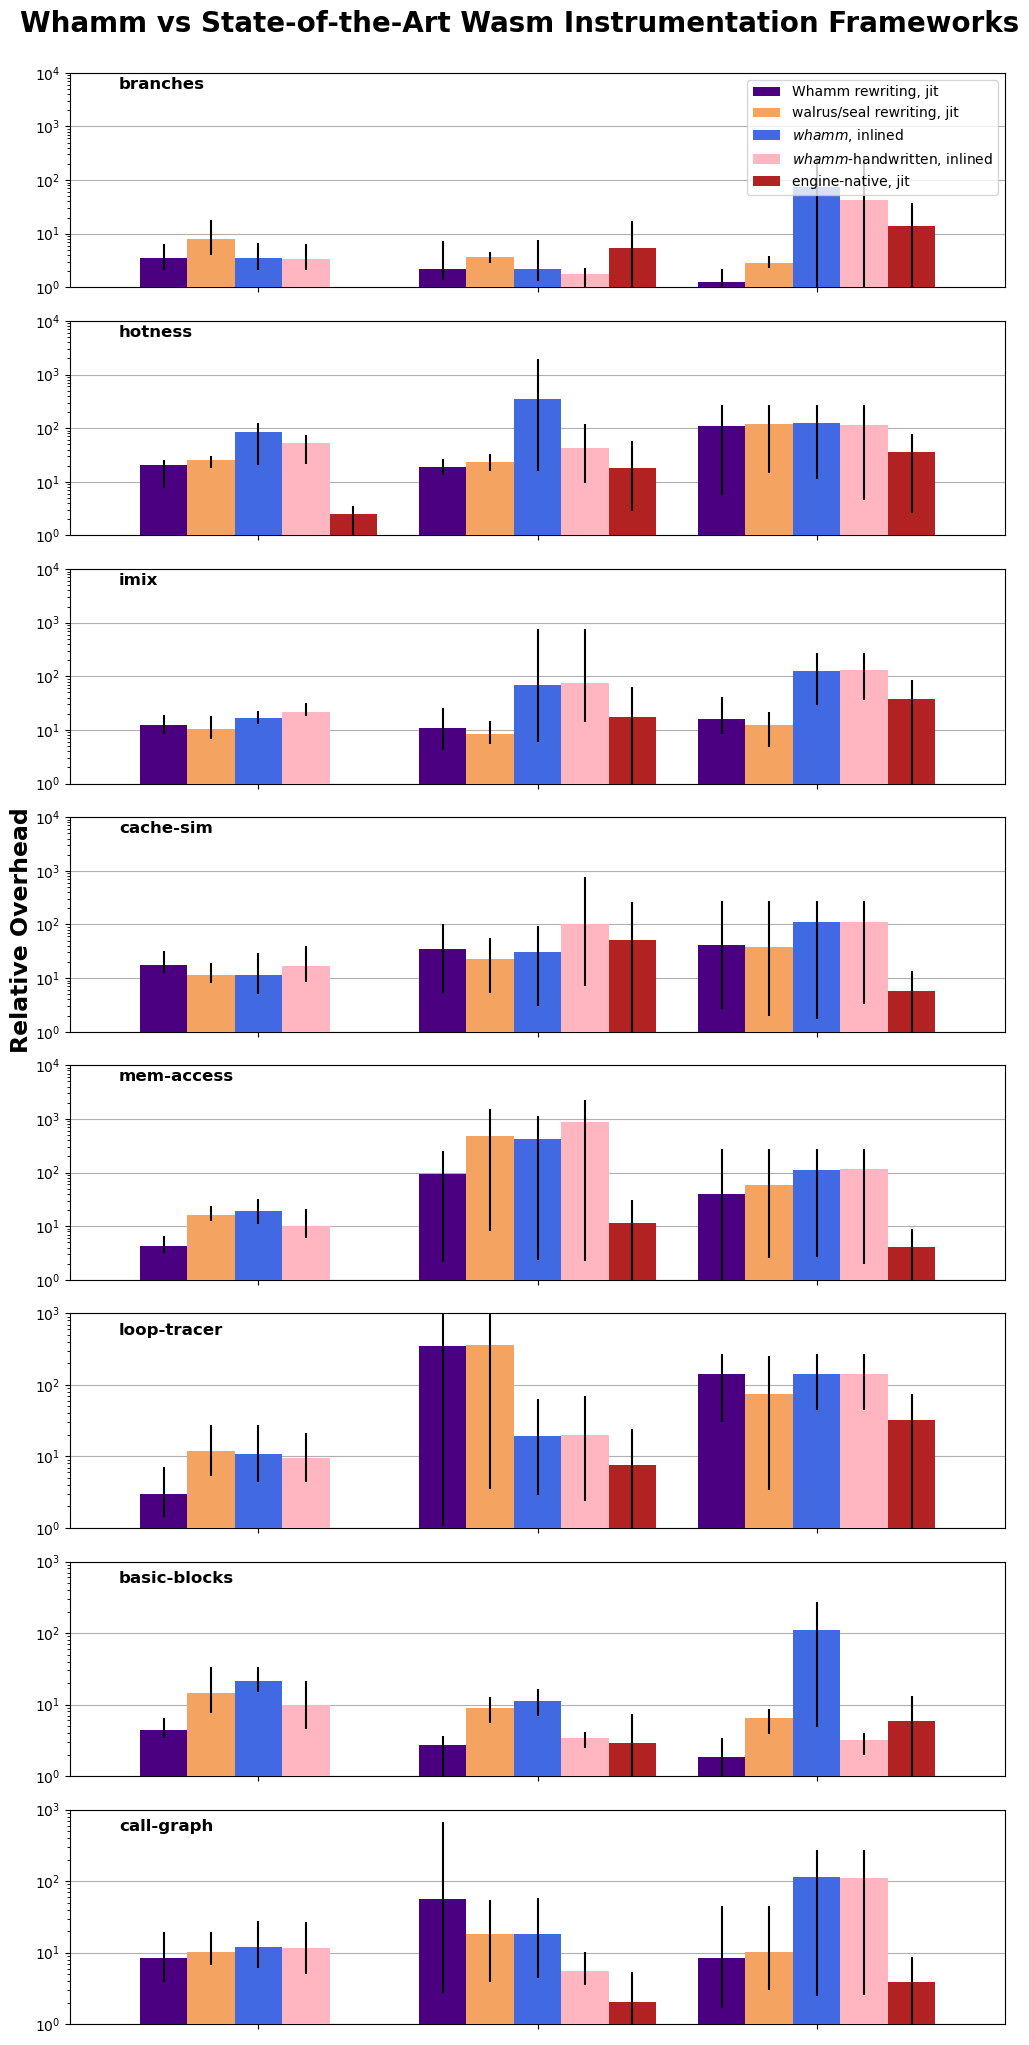

In [10]:
whamm_df = r3

SUITE = 'r3'
WHAMM_ENGINE = 'whamm_engine'
WHAMM_REWRITE = 'whamm_rewrite'
WHAMM_HW = 'whamm_hw'
ENGINE_NATIVE = 'wizard_native'
WASABI = 'wasabi'
ORCA = 'orca_rewrite'

RUNTIME_MEASUREMENT = 'run_time:mean'
# RUNTIME_MEASUREMENT = 'wiz_metrics_main:time_us'
# REPORT_MEASUREMENT = 'wiz_metrics_whamm:report_time_us'

# Baseline jit data
baseline_polybench_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)]
# print(whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)])
print(baseline_polybench_jit_df)
# baseline_polybench_jit_df.head()

def get_monitor_df(mon):
    # Monitor data, polybench data!
    monitor_polybench_df = whamm_df[(whamm_df['config:monitor'] == mon) & (whamm_df['benchmark:suite'] == SUITE) & (whamm_df['config:special'].isna())]
    
    new_df_rows = []
    for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
        baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
        assert len(baseline_data) == 1, "found multiple baselines for JIT!"
        base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]
        
        # whamm-engine
        engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # print()
        # print(benchmark_name)
        # print(engine_data)
        # print(engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values)
        # assert len(engine_data) == 11, f"found wrong number of results, expected 11: {len(engine_data)}"
        engine_inline = engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]

        # whamm-rewrite
        rewriting_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_REWRITE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # print(benchmark_name)
        # print(rewriting_data)
        # assert len(rewriting_data) == 2, f"found wrong number of results, expected 2: {len(rewriting_data)}"
        try:
            rewrite_jit = rewriting_data[rewriting_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
        except:
            if benchmark_name == 'sandspiel.wasm':
                rewrite_jit = 600
            
        # whamm-hw
        hw_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_HW) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # print(hw_data)
        # assert len(hw_data) == 11, f"found wrong number of results, expected 11: {len(hw_data)}"
        hw_inline = hw_data[hw_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]
        
        # engine_native
        virgil_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ENGINE_NATIVE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        try:
            virgil_time = virgil_data[virgil_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
        except:
            baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
      
            assert len(baseline_data) == 1, "found multiple baselines for JIT!"
            base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]

            base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
            
            # virgil
            if mon == 'cache-sim':
                virgil_time = df[df['benchmark'] == benchmark_name][f'cache-virgil'].values[0]
            else:
                virgil_time = df[df['benchmark'] == benchmark_name][f'{mon}-virgil'].values[0]
        
        # wasabi
        # wasabi_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WASABI) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # try:
        #     wasabi_time = wasabi_data[wasabi_data['config:run_mode'] == 'v8'][RUNTIME_MEASUREMENT].values[0]

        #     base_v8 = df[df['benchmark'] == benchmark_name]['BASE (v8)'].values[0]
        # except:
        #     if mon == 'cache-sim':
        #         wasabi_time = df[df['benchmark'] == benchmark_name][f'cache-wasabi'].values[0]
        #     else:
        #         wasabi_time = df[df['benchmark'] == benchmark_name][f'{mon}-wasabi'].values[0]
    
        # orca-rewrite
        orca_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == ORCA) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        # assert len(orca_data) == 2, f"found wrong number of results, expected 2: {len(orca_data)}"
        print(benchmark_name)
        print(orca_data)
        try:
            orca_jit = orca_data[orca_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
        except:
            orca_jit = 600 # 10 minute timeout

        
        # (Calculate relative overhead here)
        new_df_rows.append({
            'suite': SUITE,
            'benchmark': benchmark_name,
            'time-jit': base_jit,
            '$\\it{whamm}$-handwritten, inlined': hw_inline / base_jit,
            '$\\it{whamm}$, inlined': engine_inline / base_jit,
            'Whamm rewriting, jit': rewrite_jit / base_jit,
            'engine-native, jit': virgil_time / base_jit,
            'Orca rewriting, jit': orca_jit / base_jit,
            # 'wasabi, v8': wasabi_time / base_v8,
        })
    
    return pd.DataFrame(new_df_rows)


branches_df = get_monitor_df('branches')
hotness_df = get_monitor_df('hotness')
imix_df = get_monitor_df('imix')
cache_df = get_monitor_df('cache-sim')
mem_access_df = get_monitor_df('mem-access')
loop_tracer_df = get_monitor_df('loop-tracer')
basic_blocks_df = get_monitor_df('basic-blocks')
# instr_coverage_df = get_monitor_df('instr-coverage')
call_graph_df = get_monitor_df('call-graph')

def group(x):
    # polybench
    # if x < 0.025:
    #     return 1
    # if x < 0.05:
    #     return 2
    # return 3

    # r3
    if x < 0.17:
        return 1
    if x < 1:
        return 2
    return 3

def make_thirds(all_df):
    # all_df = all_df.dropna()
    all_df['third'] = all_df['time-jit'].apply(group)
    mean = pd.DataFrame({
        "benchmark": f"r3-{group}",
        "time-jit": df['time-jit'].mean(),
        "count": len(df),
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].mean(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].mean(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].mean(),
        "walrus/seal rewriting, jit": df['Orca rewriting, jit'].mean(),
        "engine-native, jit": df['engine-native, jit'].mean(),
        # "wasabi, v8": df['wasabi, v8'].mean()
    } for group, df in all_df.groupby("third"))
    mins = pd.DataFrame({
        "benchmark": f"r3-{group}",
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].min(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].min(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].min(),
        "walrus/seal rewriting, jit": df['Orca rewriting, jit'].min(),
        "engine-native, jit": df['engine-native, jit'].min(),
        # "wasabi, v8": df['wasabi, v8'].min()
    } for group, df in all_df.groupby("third"))
    maxs = pd.DataFrame({
        "benchmark": f"r3-{group}",
        "$\\it{whamm}$-handwritten, inlined": df['$\\it{whamm}$-handwritten, inlined'].max(),
        "$\\it{whamm}$, inlined": df['$\\it{whamm}$, inlined'].max(),
        "Whamm rewriting, jit": df['Whamm rewriting, jit'].max(),
        "walrus/seal rewriting, jit": df['Orca rewriting, jit'].max(),
        "engine-native, jit": df['engine-native, jit'].max(),
        # "wasabi, v8": df['wasabi, v8'].max()
    } for group, df in all_df.groupby("third"))
    return mean, mins, maxs

branches_df_thirds = make_thirds(branches_df)
hotness_df_thirds = make_thirds(hotness_df)
imix_df_thirds = make_thirds(imix_df)
cache_df_thirds = make_thirds(cache_df)
mem_access_df_thirds = make_thirds(mem_access_df)
loop_tracer_df_thirds = make_thirds(loop_tracer_df)
basic_blocks_df_thirds = make_thirds(basic_blocks_df)
# instr_coverage_df_thirds = make_thirds(instr_coverage_df)
call_graph_df_thirds = make_thirds(call_graph_df)

import matplotlib.pyplot as plt

def plot_df_grouped(configs):
    num = len(configs)
    fig, axs = plt.subplots(num, 1, figsize=(10, 2.5 * num))
    for i, config in enumerate(configs):
        ax = axs[i]
        dfs, ylim, mon_name, order, include_benchmarks_label = config
        include_benchmarks_label = False
        df = dfs[0]
    
        # Sort the DataFrame by 'time-jit' in increasing order
        df_sorted = df.copy() #.sort_values('time-jit')
        # Reset the index to ensure the first entry is properly handled
        df_sorted.reset_index(drop=True, inplace=True)
    
        # Setting y-axis to logarithmic scale (base 10)
        ax.set_yscale('log')
        ax.set_ylim(1, ylim)
    
        color_key = {
            'walrus/seal rewriting, jit': 'sandybrown',
            'engine-native, jit': 'firebrick',
            '$\\it{whamm}$-handwritten, inlined': 'lightpink',
            # 'engine-handwritten, jit-rt-jit': ,
            # 'engine-Ω, jit-rt-jit': ,
            '$\\it{whamm}$, inlined': 'royalblue',
            'Whamm rewriting, jit': 'indigo',
            'wasabi, v8': 'mediumseagreen'
        }
        colors = {i: color_key[i] for i in order}
    
        # to_plot = ['engine, jit-rt-int', 'engine, jit-rt-jit', 'engine, jit-wasm-int', 'engine, jit-wasm-jit', 'engine, inlined', 'rewriting, jit']
        # colors = ['sandybrown', 'firebrick', 'lightpink', 'royalblue', 'indigo', 'mediumseagreen']
        mins = dfs[1]
        maxs = dfs[2]
        means = df[[
            'Whamm rewriting, jit',
            'walrus/seal rewriting, jit',
            '$\\it{whamm}$, inlined',
            '$\\it{whamm}$-handwritten, inlined',
            'engine-native, jit',
        ]]
        errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in means.columns]
        # errors = [[means[c] * 0, means[c] * 1.5] for c in means.columns]
        # if mon_name == 'mem-access':
        #     for e in errors:
        #         print("--")
        #         print("min")
        #         print(e[0])
        #         print("max")
        #         print(e[1])
        df_sorted[order].plot(kind='bar', zorder=3, ax=ax, width=.85, color=colors, yerr=errors)
    
        
        # Set custom x-axis labels
        if include_benchmarks_label:
            ax.set_xticklabels(df_sorted['benchmark'], fontsize=12, rotation=0)  # Set the x-tick labels
            plt.xlabel('Benchmark', fontsize=17, fontweight='bold')
        else:    
            ax.set_xticklabels([]) 
        if i == 0:
            ax.legend(loc='upper right')
        else:
            ax.get_legend().remove()

        ax.text(-0.5, ylim * 0.5, mon_name, fontsize='large', fontweight='bold')
    
        # handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles, col_data, loc='upper left', bbox_to_anchor=(0, 1))
        # plt.tight_layout()
        
        # Adding labels and title
        # plt.ylabel('Relative Overhead')
        # Add gridlines
        ax.grid(True, axis='y', zorder=0)
        # create second y axis label
        # ax1 = ax.twinx()
        # ax1.set_yscale('log')
        # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
        # fig.text(0.5, 0.94, f'Ω vs. Wasm-Frameworks ({mon_name})', ha='center', va='top', fontsize=13, fontweight='bold')
        # plt.title(f'Ω vs. Wasm-Frameworks ({mon_name})')
    
    fig.text(0.5, 1.02, f'Whamm vs State-of-the-Art Wasm Instrumentation Frameworks', ha='center', va='top', fontsize=20, fontweight='bold')
    fig.text(-0.01, 0.56, f'Relative Overhead', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    
    plt.savefig(f"plots/RERUN-whamm-vs-fmk-r3.png", dpi=400, bbox_inches='tight')

targets = [
        'Whamm rewriting, jit',
        'walrus/seal rewriting, jit',
        '$\\it{whamm}$, inlined',
        '$\\it{whamm}$-handwritten, inlined',
        'engine-native, jit',
    ]

branches_df_thirds_cfg = (branches_df_thirds, 1e4, 'branches', targets, True)
hotness_df_thirds_cfg = (hotness_df_thirds, 1e4, 'hotness', targets, True)
imix_df_thirds_cfg = (imix_df_thirds, 1e4, 'imix', targets, True)
cache_df_thirds_cfg = (cache_df_thirds, 1e4, 'cache-sim', targets, True)
mem_access_df_thirds_cfg = (mem_access_df_thirds, 1e4, 'mem-access', targets, True)
loop_tracer_df_thirds_cfg = (loop_tracer_df_thirds, 1e3, 'loop-tracer', targets, True)
basic_blocks_df_thirds_cfg = (basic_blocks_df_thirds, 1e3, 'basic-blocks', targets, True)
# instr_coverage_df_thirds_cfg = (instr_coverage_df_thirds, 1e3, 'instr-coverage', targets, True)
call_graph_df_thirds_cfg = (call_graph_df_thirds, 1e3, 'call-graph', targets, True)
plot_df_grouped([branches_df_thirds_cfg, hotness_df_thirds_cfg, imix_df_thirds_cfg, cache_df_thirds_cfg, mem_access_df_thirds_cfg, loop_tracer_df_thirds_cfg, basic_blocks_df_thirds_cfg,
                #   instr_coverage_df_thirds_cfg, 
                call_graph_df_thirds_cfg,
                  ])

In [45]:
order = {
    'wasabi, v8',
    'engine-native, jit',
    'wirm rewriting, jit',
    '$\\it{wei}$-handwritten, inlined',
    '$\\it{wei}$, inlined',
    'Whamm rewriting, jit',
}
color_key = {
    'wirm rewriting, jit': 'sandybrown',
    'engine-native, jit': 'firebrick',
    '$\\it{wei}$-handwritten, inlined': 'lightpink',
    # 'engine-handwritten, jit-rt-jit': ,
    # 'engine-Ω, jit-rt-jit': ,
    '$\\it{wei}$, inlined': 'royalblue',
    'Whamm rewriting, jit': 'indigo',
    'wasabi, v8': 'mediumseagreen'
}

colors = [color_key[i] for i in order]

for n, c in color_key.items():
    print(f"{n}:{c}") 

print()

for c in colors:
    print(c)

wirm rewriting, jit:sandybrown
engine-native, jit:firebrick
$\it{wei}$-handwritten, inlined:lightpink
$\it{wei}$, inlined:royalblue
Whamm rewriting, jit:indigo
wasabi, v8:mediumseagreen

lightpink
indigo
firebrick
mediumseagreen
royalblue
sandybrown
